In [118]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read in all datasets
owner_dataset = pd.read_csv('data/owner_dataset.csv')
race_ethnicity_dataset = pd.read_csv('data/race-ethnicity-dataset.csv')
states_dataset = pd.read_csv('data/states_dataset.csv')
summary_dataset = pd.read_csv('data/summary_dataset.csv')
tech_dataset = pd.read_csv('data/tech_dataset.csv')

# Race Visualizations

**Topics:**
- Business ownership
- Industry augmentation and income
- Income

/var/folders/23/5p0ycg913qq12vh3l31n93zc0000gn/T/ipykernel_41229/2654811788.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race['RaceOrEthnicGroup'][race['RaceOrEthnicGroup'] == 'Black or African American alone'] = 'Black or African American'
/var/folders/23/5p0ycg913qq12vh3l31n93zc0000gn/T/ipykernel_41229/2654811788.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race['RaceOrEthnicGroup'][race['RaceOrEthnicGroup'] == 'American Indian and Alaska Native alone'] = 'American Indian and Alaska Native'
/var/folders/23/5p0ycg913qq12vh3l31n93zc0000gn/T/ipykernel_41229/2654811788.py:26: SettingWithCopyWarning: 
A va

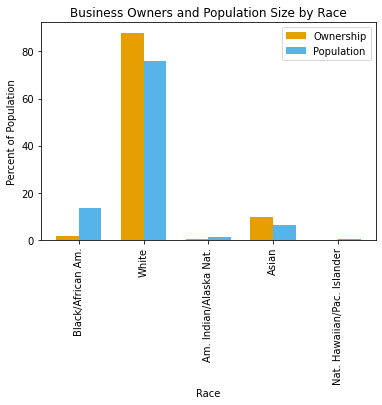

In [119]:
# Topic 1: Business Ownership

# Make sure to focus census data only on race
re_only_data = owner_dataset.copy()
re_only_data = re_only_data[re_only_data['Industry'] == 'Total for all sectors']
re_only_data = re_only_data[re_only_data['OwnerEthnicity'] == 'All owners of respondent firms']
re_only_data = re_only_data[re_only_data['OwnerRace'] != 'All owners of respondent firms']
re_only_data = re_only_data[re_only_data['OwnerVetStatus'] == 'All owners of respondent firms']
re_only_data = re_only_data[re_only_data['OwnedSince'] == 'Total reporting']
re_only_data = re_only_data[re_only_data['Year'] == 2018]
re_only_data = re_only_data[re_only_data['OwnerRace'] != 'Minority']
re_only_data = re_only_data[re_only_data['OwnerRace'] != 'Nonminority']

# Condense working dataset to only the data needed
re_only_data = re_only_data[['OwnerRace', 'OwnerCt']]
re_only_data = re_only_data[0::3]

# Get population data ready to merge with Census data
race = race_ethnicity_dataset.copy()
race = race[race['RaceOrEthnicGroup'] != 'Two or More Races']
race = race[race['RaceOrEthnicGroup'] != 'Hispanic or Latino']
race = race[race['RaceOrEthnicGroup'] != 'White alone, not Hispanic or Latino']
race['RaceOrEthnicGroup'][race['RaceOrEthnicGroup'] == 'White alone'] = 'White'
race['RaceOrEthnicGroup'][race['RaceOrEthnicGroup'] == 'Black or African American alone'] = 'Black or African American'
race['RaceOrEthnicGroup'][race['RaceOrEthnicGroup'] == 'American Indian and Alaska Native alone'] = 'American Indian and Alaska Native'
race['RaceOrEthnicGroup'][race['RaceOrEthnicGroup'] == 'Asian alone'] = 'Asian'
race['RaceOrEthnicGroup'][race['RaceOrEthnicGroup'] == 'Native Hawaiian and Other Pacific Islander alone'] = 'Native Hawaiian and Other Pacific Islander'

# Rename to give consistent header to merger on
race = race.rename(columns={'RaceOrEthnicGroup': 'OwnerRace', 'Value': 'PopPerc'})

# Merge data together
re_only = re_only_data.merge(race, how='inner', on='OwnerRace')

# Get percent ownership
total_owners = re_only['OwnerCt'].sum()
re_only['OwnerPerc'] = re_only['OwnerCt'] / total_owners * 100

# Get owner augmentation (defined as proportional ownership rate versus expected ownership rate (i.e., proportion of population))
re_only['OwnerAugmentation'] = re_only['OwnerPerc'] / re_only['PopPerc']

# Abbreviate race names
re_only['OwnerRace'][re_only['OwnerRace'] == 'White'] = 'White'
re_only['OwnerRace'][re_only['OwnerRace'] == 'Black or African American'] = 'Black/African Am.'
re_only['OwnerRace'][re_only['OwnerRace'] == 'American Indian and Alaska Native'] = 'Am. Indian/Alaska Nat.'
re_only['OwnerRace'][re_only['OwnerRace'] == 'Asian'] = 'Asian'
re_only['OwnerRace'][re_only['OwnerRace'] == 'Native Hawaiian and Other Pacific Islander'] = 'Nat. Hawaiian/Pac. Islander'

# Graph 1: comparison of ownership to population percentage
width = 0.35
fig, ax = plt.subplots()
labels = np.arange(len(re_only['OwnerRace']))
p1 = ax.bar(labels - width/2, re_only['OwnerPerc'], width, label='Ownership', color='#E69F00')
p2 = ax.bar(labels + width/2, re_only['PopPerc'], width, label='Population', color='#56B4E9')
ax.set_xticks(labels, labels=(list(re_only['OwnerRace'])), rotation=90)
ax.set_title('Business Owners and Population Size by Race')
ax.set_ylabel('Percent of Population')
ax.set_xlabel('Race')
ax.legend()


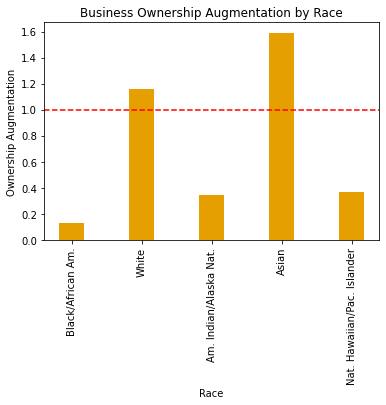

In [120]:
# Graph 2: ownership augmentation by race
width = 0.35
fig, ax = plt.subplots()
labels = np.arange(len(re_only['OwnerRace']))
p3 = ax.bar(labels, re_only['OwnerAugmentation'], width, label='Percent of Ownership', color='#E69F00')
ax.set_xticks(labels, labels=(list(re_only['OwnerRace'])), rotation=90)
ax.set_title('Business Ownership Augmentation by Race')
ax.set_xlabel('Race')
ax.set_ylabel('Ownership Augmentation')
ax.axhline(y=1, color='r', linestyle='--')

/var/folders/23/5p0ycg913qq12vh3l31n93zc0000gn/T/ipykernel_41229/488408988.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_industry['Race'][race_industry['Race'] == 'White'] = 'White'
/var/folders/23/5p0ycg913qq12vh3l31n93zc0000gn/T/ipykernel_41229/488408988.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_industry['Race'][race_industry['Race'] == 'Black or African American'] = 'Black/African Am.'
/var/folders/23/5p0ycg913qq12vh3l31n93zc0000gn/T/ipykernel_41229/488408988.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

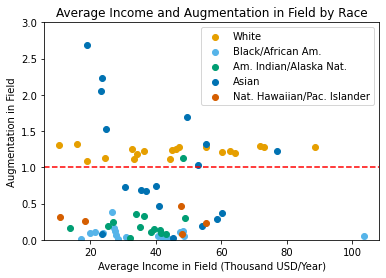

In [121]:
# Topic 2: Race and Industry

# Make sure to focus census data only on race
race_industry = summary_dataset.copy()
race_industry = race_industry[race_industry['Industry'] != 'Total for all sectors']
race_industry = race_industry[race_industry['Ethnicity'] == 'Total']
race_industry = race_industry[race_industry['Race'] != 'Total']
race_industry = race_industry[race_industry['Race'] != 'Equally minority/nonminority']
race_industry = race_industry[race_industry['Race'] != 'Minority']
race_industry = race_industry[race_industry['Race'] != 'Nonminority']
race_industry = race_industry[race_industry['VetStatus'] == 'Total']
race_industry = race_industry[race_industry['SpousalOwnershipSharing'] == 'Total reporting']
race_industry = race_industry[race_industry['Sex'] == 'Total']

# Refine search to essential characteristics
race_industry = race_industry[['Race', 'Industry', 'EmployeeCt', 'AnnualPayrollInThousands']]

# Merge data with demographics
race_industry['AvgSalary'] = race_industry['AnnualPayrollInThousands'] / race_industry['EmployeeCt']
race_2 = race.copy()
race_2 = race_2.rename(columns={'OwnerRace': 'Race', 'Value': 'PopPerc'})
race_industry = race_industry.merge(race_2, how='inner', on='Race')

# Abbreviate race names
race_industry['Race'][race_industry['Race'] == 'White'] = 'White'
race_industry['Race'][race_industry['Race'] == 'Black or African American'] = 'Black/African Am.'
race_industry['Race'][race_industry['Race'] == 'American Indian and Alaska Native'] = 'Am. Indian/Alaska Nat.'
race_industry['Race'][race_industry['Race'] == 'Asian'] = 'Asian'
race_industry['Race'][race_industry['Race'] == 'Native Hawaiian and Other Pacific Islander'] = 'Nat. Hawaiian/Pac. Islander'

# Get augmentation and representation of races in different industries
industry_size = race_industry.groupby('Industry')['EmployeeCt'].sum()
race_industry['Representation'] = 0
for i in range(len(race_industry)):
    race_industry['Representation'].iloc[i] = race_industry['EmployeeCt'].iloc[i] / industry_size[race_industry['Industry'].iloc[i]] * 100
race_industry['Augmentation'] = race_industry['Representation'] / race_industry['PopPerc']

# Graph 3: comparison of race augmentation in field and average income
fig, ax = plt.subplots()
i = 0
colors = ['#E69F00', '#56B4E9', '#009E73', '#0072B2', '#D55E00']
for this_race in race_industry['Race'].unique():
    p3 = ax.scatter(race_industry['AvgSalary'][race_industry['Race'] == this_race], race_industry['Augmentation'][race_industry['Race'] == this_race], color=colors[i])
    i += 1
ax.set_title('Average Income and Augmentation in Field by Race')
ax.set_xlabel('Average Income in Field (Thousand USD/Year)')
ax.set_ylabel('Augmentation in Field')
ax.legend(race_industry['Race'].unique())
ax.set_ylim([0, 3])
ax.axhline(y=1, color='r', linestyle='--')

Text(0.5, 0, 'Race')

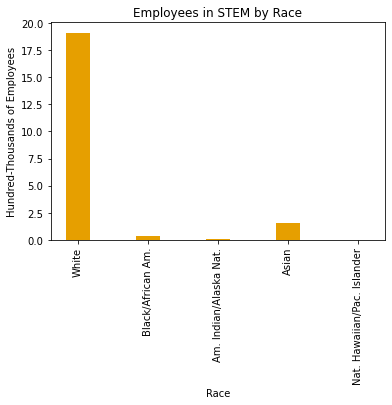

In [122]:
# Case study: work in tech

# Get only the wanted part of data
race_tech = race_industry.copy()
race_tech = race_tech[race_tech['Industry'] == 'Professional, scientific, and technical services']

# Get only necessary categories
race_tech = race_tech[['Race', 'EmployeeCt', 'PopPerc']]

# Graph 4: make-up of tech field by race
fig, ax = plt.subplots()
labels = np.arange(len(race_tech['Race']))
p4 = ax.bar(race_tech['Race'], race_tech['EmployeeCt']/100000, width, color='#E69F00')
ax.set_xticks(labels, labels=(list(race_tech['Race'])), rotation=90)
ax.set_title('Employees in STEM by Race')
ax.set_ylabel('Hundred-Thousands of Employees')
ax.set_xlabel('Race')

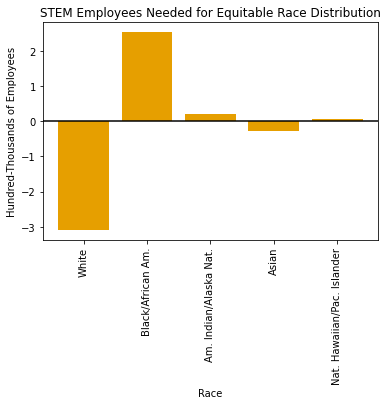

In [123]:
# Get how many people would be required to be hired in tech to have equitable distribution of employment
tech_total = race_tech['EmployeeCt'].sum()
race_tech['MakeupEmp'] = ((race_tech['PopPerc'] / 100) - (race_tech['EmployeeCt'] / tech_total)) * tech_total / 100000

# Graph 5: make-up of tech field by race
fig, ax = plt.subplots()
labels = np.arange(len(race_tech['Race']))
p5 = ax.bar(race_tech['Race'], race_tech['MakeupEmp'], color='#E69F00')
ax.set_xticks(labels, labels=(list(race_tech['Race'])), rotation=90)
ax.set_title('STEM Employees Needed for Equitable Race Distribution')
ax.set_ylabel('Hundred-Thousands of Employees')
ax.set_xlabel('Race')
ax.axhline(y=0, color='k', linestyle='-')

/var/folders/23/5p0ycg913qq12vh3l31n93zc0000gn/T/ipykernel_41229/2417925147.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_income['Race'][race_income['Race'] == 'Black or African American'] = 'Black/African Am.'
/var/folders/23/5p0ycg913qq12vh3l31n93zc0000gn/T/ipykernel_41229/2417925147.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_income['Race'][race_income['Race'] == 'American Indian and Alaska Native'] = 'Am. Indian/Alaska Nat.'
/var/folders/23/5p0ycg913qq12vh3l31n93zc0000gn/T/ipykernel_41229/2417925147.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Text(0.5, 0, 'Race')

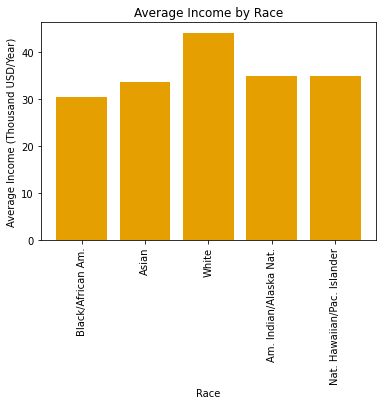

In [124]:
# Plot 3: Compare average income of different races and sexes

race_income = summary_dataset.copy()
race_income = race_income[race_income['Industry'] == 'Total for all sectors']
race_income = race_income[race_income['Ethnicity'] == 'Total']
race_income = race_income[race_income['Race'] != 'Total']
race_income = race_income[race_income['Race'] != 'Equally minority/nonminority']
race_income = race_income[race_income['Race'] != 'Minority']
race_income = race_income[race_income['Race'] != 'Nonminority']
race_income = race_income[race_income['VetStatus'] == 'Total']
race_income = race_income[race_income['SpousalOwnershipSharing'] == 'Total reporting']
race_income = race_income[race_income['Sex'] == 'Total']

# Abbreviate race names
race_income['Race'][race_income['Race'] == 'White'] = 'White'
race_income['Race'][race_income['Race'] == 'Black or African American'] = 'Black/African Am.'
race_income['Race'][race_income['Race'] == 'American Indian and Alaska Native'] = 'Am. Indian/Alaska Nat.'
race_income['Race'][race_income['Race'] == 'Asian'] = 'Asian'
race_income['Race'][race_income['Race'] == 'Native Hawaiian and Other Pacific Islander'] = 'Nat. Hawaiian/Pac. Islander'

# Get only necessary columns
race_income = race_income[['Race', 'EmployeeCt', 'AnnualPayrollInThousands']]
race_income['AvgSalary'] = race_income['AnnualPayrollInThousands'] / race_income['EmployeeCt']
fig, ax = plt.subplots()
labels = np.arange(len(race_income['Race']))
p6 = ax.bar(race_income['Race'], race_income['AvgSalary'], color='#E69F00')
ax.set_xticks(labels, labels=(list(race_income['Race'])), rotation=90)
ax.set_title('Average Income by Race')
ax.set_ylabel('Average Income (Thousand USD/Year)')
ax.set_xlabel('Race')

In [125]:
#Percentage of businesses owned by women over the different “owned since” time periods
# Get only the wanted part of data
WomenOwned = owner_dataset.copy()
WomenOwned = WomenOwned[WomenOwned['OwnerEthnicity'] == 'All owners of respondent firms']
WomenOwned = WomenOwned[race_income['Industry'] == 'Total for all sectors']
WomenOwned = WomenOwned[WomenOwned['OwnerRace'] == 'All owners of respondent firms']
WomenOwned = WomenOwned[WomenOwned['OwnerVetStatus'] == 'All owners of respondent firms']
WomenOwned = WomenOwned[WomenOwned['Year'] == 2018]
WomenOwned = WomenOwned[WomenOwned['OwnerSex'] == 'Female']
#Creating graph
sns.lineplot(data=WomenOwned, x="OwnedSince", y="OwnerCtPercentage")

KeyError: 'Industry'

In [ ]:
#What percentage of owners are male/female in each industry?
# Get only the wanted part of data
datawanted = owner_dataset.copy()
datawanted = datawanted[datawanted['OwnerEthnicity'] == 'All owners of respondent firms']
datawanted = datawanted[datawanted['OwnerRace'] == 'All owners of respondent firms']
datawanted = datawanted[datawanted['OwnerVetStatus'] == 'All owners of respondent firms']
datawanted = datawanted[datawanted['OwnedSince'] == 'Total reporting']
datawanted = datawanted[datawanted['Year'] == 2018]
datawanted = datawanted[datawanted['OwnerSex'] != 'All owners of respondent firms']

# Get only necessary columns
datawanted = datawanted[['OwnerSex', 'Industry', 'OwnerCtPercentage']]

#Get Men and Women Data
womenData = datawanted[datawanted['OwnerSex'] == 'Female']
menData = datawanted[datawanted['OwnerSex'] == 'Male']

#Create figure
fig, ax = plt.subplots()
labels = np.arange(len(datawanted['Industry']))
WomenBar = ax.bar(womenData, datawanted['OwnerCtPercentage'], label = 'Women')
MenBar = ax.bar(menData, datawanted['OwnerCtPercentage'], label = 'Men')

#Setting Labels and things
ax.set_xticks(labels, labels=(list(datawanted['Industry'])))
ax.set_title('Percentages of Businesses Owned by Women and Men by Industry')
ax.set_ylabel('Percentage of Businesses Owned')

ax.bar_label(WomenBar)
ax.bar_label(MenBar)

In [ ]:
#What does the SpousalOwnershipsharing percentage variable look like across different industries? - In Summary Data
# Get only the wanted part of data
datawanted = summary_dataset.copy()
datawanted = datawanted[datawanted['Ethnicity'] == 'Total']
datawanted = datawanted[datawanted['Sex'] != 'Total']
datawanted = datawanted[datawanted['Race'] == 'Total']
datawanted = datawanted[datawanted['VetStatus'] == 'Total'] 
datawanted = datawanted[datawanted['SpousalOwnershipSharing'] != 'Total Reporting']
datawanted = datawanted[datawanted['SpousalOwnershipSharing'] != 'All firms']
datawanted = datawanted[datawanted['SpousalOwnershipSharing'] != 'Not Applicable']
datawanted = datawanted[datawanted['SpousalOwnershipSharing'] != 'Item not reported']
datawanted = datawanted[datawanted['OwnedSince'] == 'Total reporting']
datawanted = datawanted[datawanted['Year'] == 2018]

# Get only necessary columns
datawanted = datawanted[['SpousalOwnershipSharing', 'Industry', 'EmployerFirmCtPerc']]

#Get Men and Women Data
EquallyOperated = datawanted[datawanted['SpousalOwnershipSharing'] == 'Jointly owned and equally operated by spouses']
MaleSpouse = datawanted[datawanted['SpousalOwnershipSharing'] == 'Jointly owned but primarily operated by male spouse']
FemaleSpouse = datawanted[datawanted['SpousalOwnershipSharing'] == 'Jointly owned but primarily operated by female spouse']
NotJoint = datawanted[datawanted['SpousalOwnershipSharing'] == 'Not jointly owned by spouses']

#Create figure
fig, ax = plt.subplots()
labels = np.arange(len(datawanted['Industry']))
EqualBar = ax.bar(EquallyOperated, datawanted['EmployerFirmCtPerc'], label = 'Jointly owned and equally operated by spouses')
MaleBar = ax.bar(MaleSpouse, datawanted['EmployerFirmCtPerc'], label = 'Jointly owned but primarily operated by male spouse')
FemaleBar = ax.bar(FemaleSpouse, datawanted['EmployerFirmCtPerc'], label = 'Jointly owned but primarily operated by female spouse')
NoneBar = ax.bar(NotJoint, datawanted['EmployerFirmCtPerc'], label = 'Not jointly owned by spouses')

#Setting Labels and things
ax.set_xticks(labels, labels=(list(datawanted['Industry'])))
ax.set_title('How Spousal Ownership Sharing is Distributed Across Industries')
ax.set_ylabel('Percentage of Firms Owned')

ax.bar_label(EqualBar)
ax.bar_label(MaleBar)
ax.bar_label(FemaleBar)
ax.bar_label(NoneBar)